# OpenPyXL 패키지

## 파이썬을 이용한 엑셀 파일 편집 패키지

## 양식, 이미지, 함수 등을 유지할 수 있음

!pip install openpyxl

import openpyxl

wb = openpyxl.load_workbook(‘file.xlsx’) # 파일 열기

sheet_name = wb.get_sheet_names() # 시트 이름 읽기

sheet = wb.get_sheet_by_name(‘시트이름’) # 시트 이름 기반으로 시트 읽기

sheet[‘A1’].value # 특정 셀의 값 읽기

sheet.cell(row=1, column=1).value # 인덱싱하여 값 읽기

df = pd.DataFrame(sheet.values) # 데이터프레임으로 변환

wb = openpyxl.Workbook() # 새 파일 만들기

wb.create_sheet() # 시트 추가

wb.remove_sheet(wb.get_sheet_by_name('Sheet1')) # Sheet1 제거

wb.copy_worksheet(wb["Sheet2"]) # 시트 복사

wb = openpyxl.load_workbook('file.xlsx')

sheet = wb.active # 해당 파일 활성화

sheet.title = 'rename_Sheet1' # 시트 이름 변경

wb.save('output.xlsx') # 파일 저장

img = openpyxl.drawing.image.Image(‘img.jpg’) # 이미지 불러오기

img.width = 320

img.height = 240

sheet.add_image(img, 'A1') # 이미지 붙여넣기

# 가상환경 사용하기

## conda 가상환경

가상환경 생성, 활성화, 비활성화, 제거

>conda create -n (이름) python=(버전)

>conda activate (이름)

>conda deactivate (이름)

>conda ｅｎｖ remove -n (이름)

패키지 설치시 conda 패키지 관리자를 이용해야 함

venv 가상환경

가상환경 생성, 활성화, 비활성화, 제거

>python -m venv (이름)

(가상환경 이름)/Scripts 경로로 이동

activate.bat (cmd), Activate.ps1 (powershell) 실행

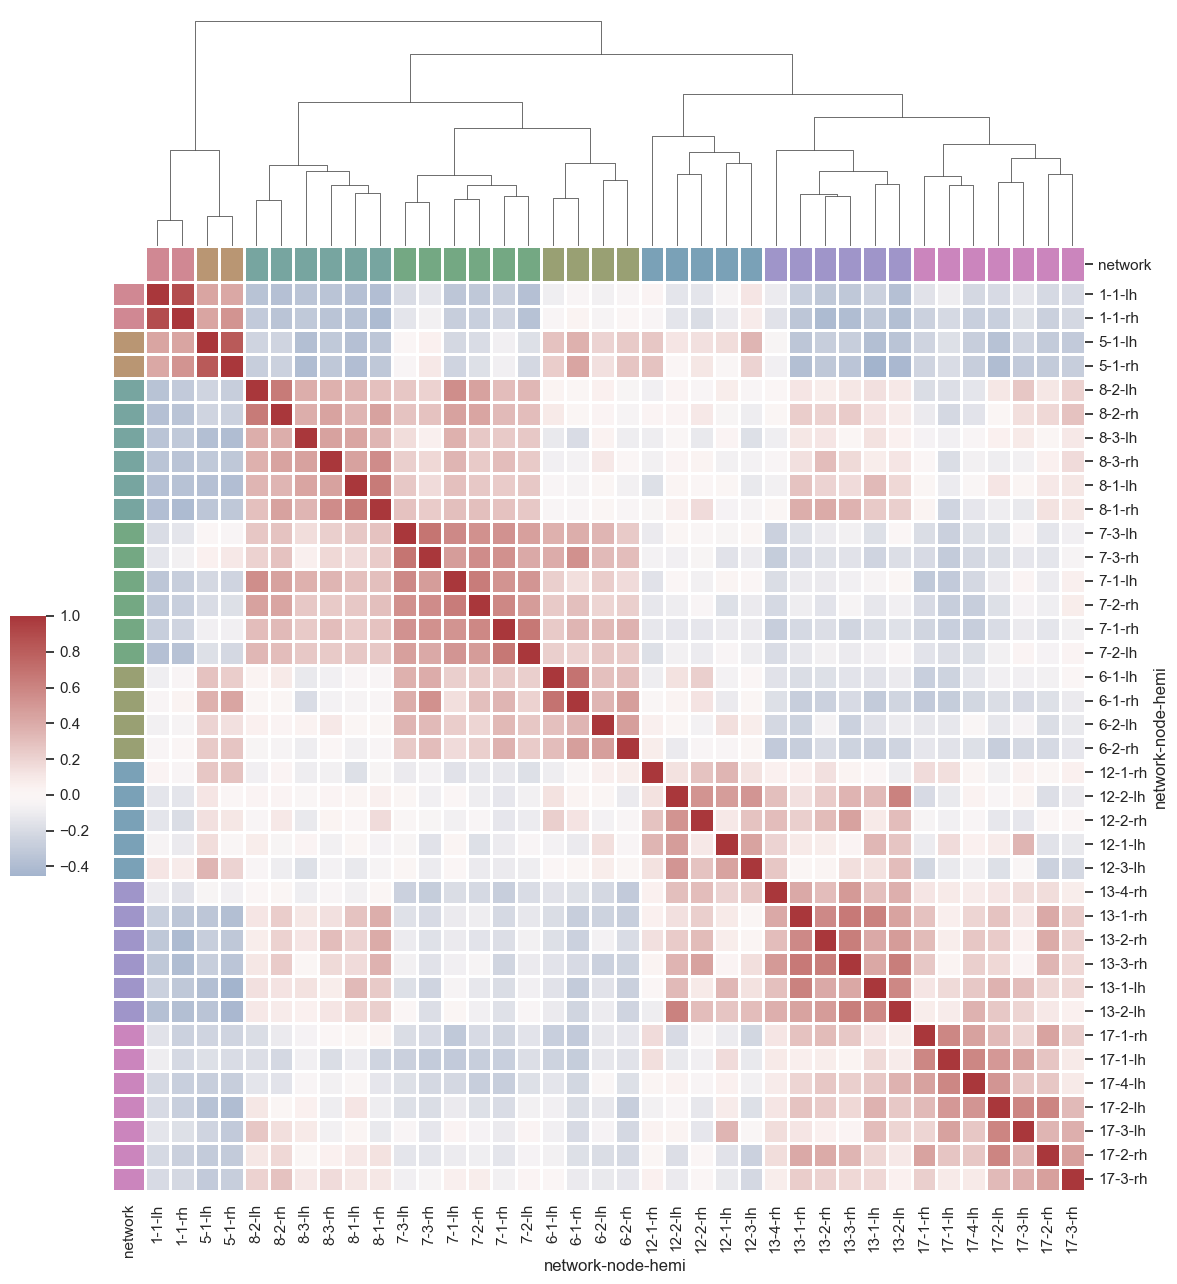

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [2]:
df

network           1                     5                     6             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219   0.017912 -25.305094 -75.461159 -70.289261   
916      -33.554138 -38.605621 -32.935612 -21.783203 -16.198238 -34.893780   
917      -78.539566 -74.197189 -32.800556 -37.021500   2.098941 -18.581594   
918     -103.235825 -98.744286 -14.330512 -17.224781  -3.007454 -42.672840   
919      -36.288868 -10.762070  26.558777  21.377319   9.652065  12.693388   

network                                7             ...         13  \
node             2                     1             ...          2   
hemi            lh         rh         lh         rh  ...         rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...  14.738475   
1        10.269546  31.275831 -26.309488 -18.077026  ...  23.792282   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   8.968520   
3        32.634335  45.825409 -47.632999  -6.580215  ...  19.627728   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...  55.853088   
..             ...        ...        ...        ...  ...        ...   
915     -13.119029  -5.194376 -56.022263 -24.290606  ... -19.436220   
916      16.504656  13.005379  26.230785   4.764211  ...  16.711153   
917      11.386637   3.676295  52.871113  -3.970096  ...  45.261150   
918       1.581095 -38.023777  37.736561   4.872248  ...  33.483253   
919     -24.773617 -62.247086  -4.883728 -49.077343  ...  -8.466401   

network                               17                                   \
node             3          4          1                     2              
hemi            rh         rh         lh         rh         lh         rh   
0       -16.853010 -34.217819 -21.734550   1.028253   7.791784  68.903725   
1         8.927007 -19.732401 -13.035799  46.381824 -15.752450  31.000332   
2         1.413584  -4.955075  26.033442  34.212200   1.326110 -22.580757   
3        49.208748   1.661293  55.297466   4.255006  -2.420144  12.098393   
4        46.737320   4.586625  43.067562  52.219875  28.232882 -11.719750   
..             ...        ...        ...        ...        ...        ...   
915      15.894722  22.195951  76.179489  51.934669  -6.614513  -6.690762   
916      17.339653  13.682954  50.962399  13.696922  63.503616  57.401176   
917      37.007389  29.753304  43.800747   8.144480  47.281460  70.499649   
918      37.434860 -14.403917  46.674419  40.954796   0.877180  37.577152   
919      23.855883  48.888733 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 38 columns]

In [3]:
mpg = sns.load_dataset("mpg")

In [4]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


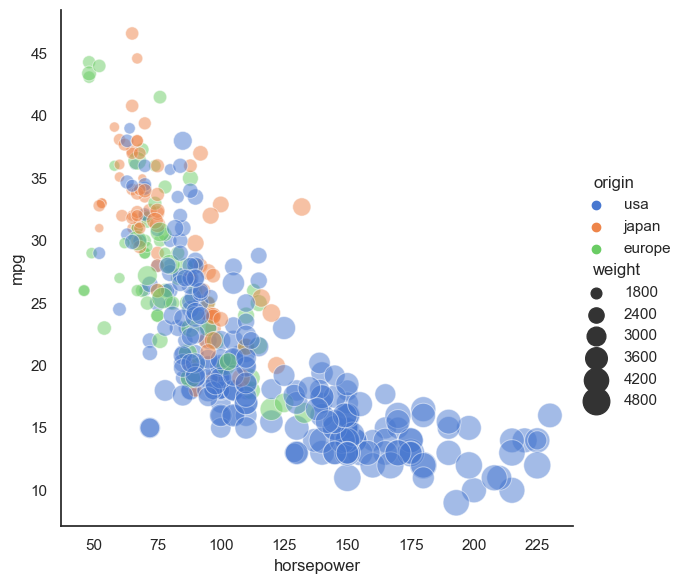

In [22]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

In [23]:
df = pd.read_csv("C:/Users/user/Downloads/한국자산관리공사_국유부동산 매각현황_20211231.csv", encoding='cp949')

## 실습
* regplot 만들어보기

In [25]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

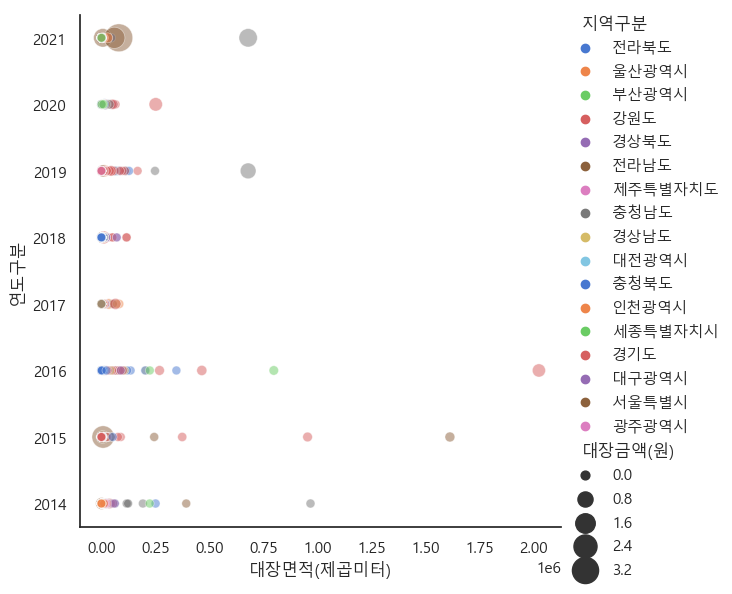

In [29]:
sns.relplot(x="대장면적(제곱미터)", y="연도구분", hue="지역구분", size="대장금액(원)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

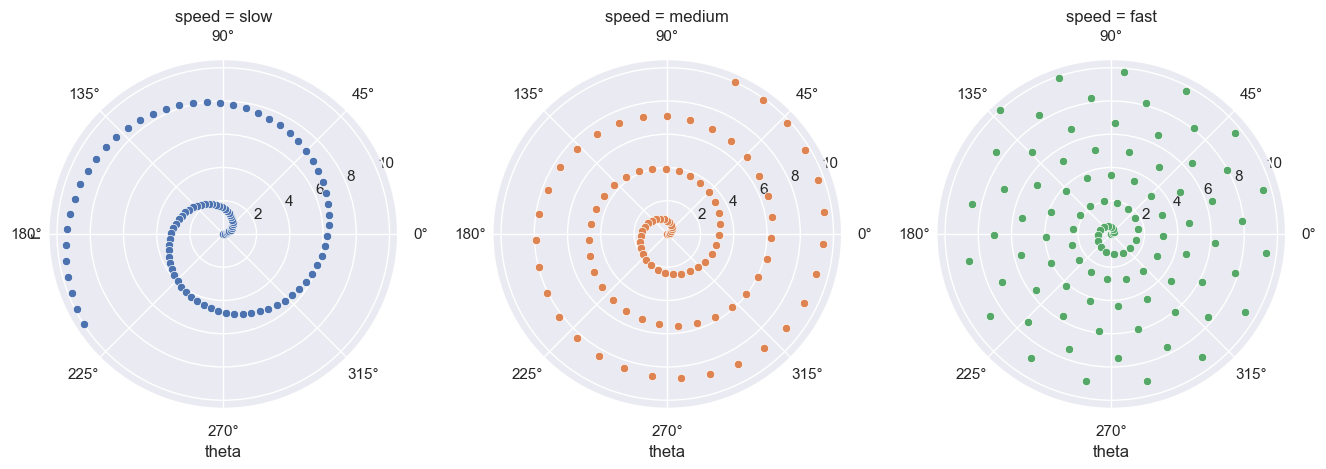

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

# 과제
* 오늘 연습했거나 이전에 사용했던 plt 중 3종류 이상을 시연할 것
* 데이터 셋 및 전처리 등은 자유롭게 진행한다
* 각 시각화 정보는 xlsx 파일로 input, ouput을 저장한다
* 각 시각화별로 간단한 논리가 첨부되어야 한다.

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [35]:
def cut_int(x):
    if x == 'Ideal':
        return 5
    if x == 'Premium':
        return 4
    if x == 'Good':
        return 3
    if x == 'Very Good':
        return 2
    if x == 'Fair':
        return 1

In [36]:
diamonds['cut_num'] = diamonds['cut'].apply(lambda x: cut_int(x))

In [37]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4


In [38]:
diamonds['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

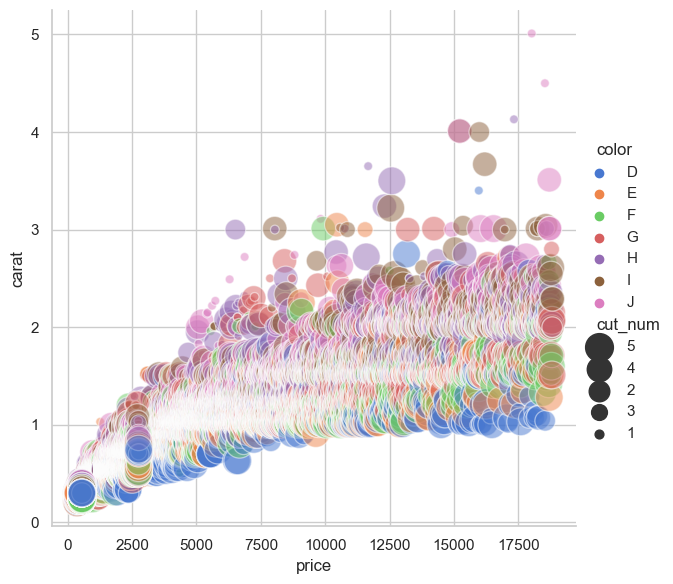

In [10]:
sns.relplot(x="price", y="carat", hue="color", size="cut_num",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=diamonds)

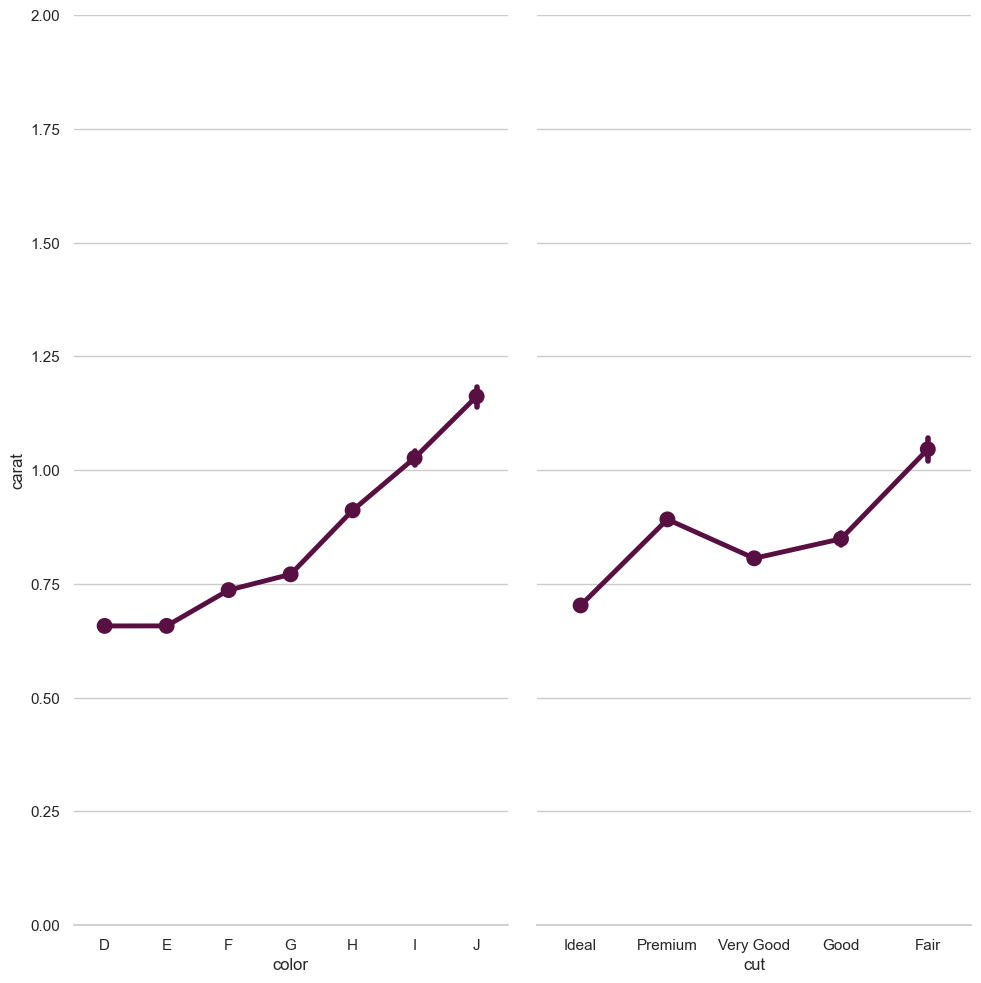

In [48]:
titanic = sns.load_dataset("titanic")

g = sns.PairGrid(diamonds, y_vars="carat",
                 x_vars=["color", "cut"],
                 height=10, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 2))
sns.despine(fig=g.fig, left=True)

In [50]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4


In [68]:
diamonds['carat'].max()

5.01

In [69]:
diamonds['carat'].min()

0.2

In [70]:
diamonds['carat'].median()

0.7

In [71]:
diamonds['carat'].mean()

0.7979397478679852

In [11]:
def carat_cha(x):
    if x >= 4:
        return '5캐럿'
    elif x >= 3:
        return '4캐럿'
    elif x >= 2:
        return '3캐럿'
    elif x >= 1:
        return '2캐럿'
    else:
        return '1캐럿'

In [12]:
diamonds['cha_carat'] = diamonds['carat'].apply(lambda x: carat_cha(x))

In [13]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,cha_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,1캐럿
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,1캐럿
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1캐럿
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,1캐럿
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,1캐럿
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,1캐럿
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,1캐럿
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,1캐럿
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,1캐럿


<AxesSubplot: xlabel='year', ylabel='month'>

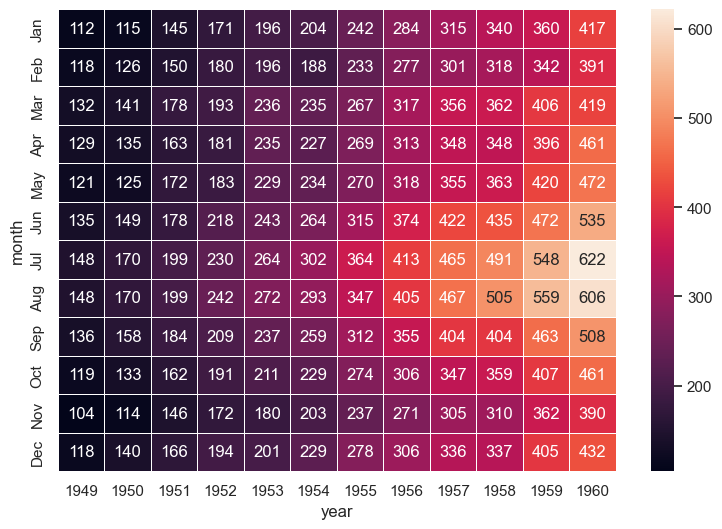

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)
 ---
sns.set_theme()

flights = diamonds.pivot("cut_num", "cha_carat", "price")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [77]:
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [14]:
diamonds2 = diamonds[["cut", "cha_carat", "price"]]

In [15]:
diamonds2

,cut,cha_carat,price
0,Ideal,1캐럿,326
1,Premium,1캐럿,326
2,Good,1캐럿,327
3,Premium,1캐럿,334
4,Good,1캐럿,335
...,...,...,...
53935,Ideal,1캐럿,2757
53936,Good,1캐럿,2757
53937,Very Good,1캐럿,2757
53938,Premium,1캐럿,2757


In [97]:
round(diamonds2[(diamonds2['cha_carat'] == "1캐럿") & (diamonds2['cut'] == "Ideal")]['price'].mean())

1546

In [16]:
diamonds3 = round(diamonds2.groupby(['cut', 'cha_carat']).mean())

In [17]:
diamonds3

price
cut       cha_carat         
Ideal     1캐럿         1546.0
          2캐럿         7898.0
          3캐럿        15533.0
          4캐럿        14427.0
          5캐럿            NaN
Premium   1캐럿         1598.0
          2캐럿         7234.0
          3캐럿        14907.0
          4캐럿        14940.0
          5캐럿        15223.0
Very Good 1캐럿         1732.0
          2캐럿         7272.0
          3캐럿        15121.0
          4캐럿        10933.0
          5캐럿        15984.0
Good      1캐럿         1793.0
          2캐럿         6346.0
          3캐럿        14575.0
          4캐럿        15401.0
          5캐럿            NaN
Fair      1캐럿         2092.0
          2캐럿         5294.0
          3캐럿        11657.0
          4캐럿        13366.0
          5캐럿        17959.0

In [113]:
len(diamonds3.index)

25

In [117]:
index_num = np.arange(0, 25)

In [118]:
index_num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [119]:
diamonds3['index_num'] = np.arange(0, 25)

In [123]:
diamonds3

price  index_num
cut       cha_carat                    
Ideal     1캐럿         1546.0          0
          2캐럿         7898.0          1
          3캐럿        15533.0          2
          4캐럿        14427.0          3
          5캐럿            NaN          4
Premium   1캐럿         1598.0          5
          2캐럿         7234.0          6
          3캐럿        14907.0          7
          4캐럿        14940.0          8
          5캐럿        15223.0          9
Very Good 1캐럿         1732.0         10
          2캐럿         7272.0         11
          3캐럿        15121.0         12
          4캐럿        10933.0         13
          5캐럿        15984.0         14
Good      1캐럿         1793.0         15
          2캐럿         6346.0         16
          3캐럿        14575.0         17
          4캐럿        15401.0         18
          5캐럿            NaN         19
Fair      1캐럿         2092.0         20
          2캐럿         5294.0         21
          3캐럿        11657.0         22
          4캐럿        13366.0         23
          5캐럿        17959.0         24

In [19]:
diamonds3.reset_index(inplace=True)

In [20]:
diamonds3

,cut,cha_carat,price
0,Ideal,1캐럿,1546.0
1,Ideal,2캐럿,7898.0
2,Ideal,3캐럿,15533.0
3,Ideal,4캐럿,14427.0
4,Ideal,5캐럿,NaN
5,Premium,1캐럿,1598.0
6,Premium,2캐럿,7234.0
7,Premium,3캐럿,14907.0
8,Premium,4캐럿,14940.0
9,Premium,5캐럿,15223.0


In [127]:
diamonds3 = diamonds3.drop('index_num', axis = 1)

In [21]:
diamonds3

,cut,cha_carat,price
0,Ideal,1캐럿,1546.0
1,Ideal,2캐럿,7898.0
2,Ideal,3캐럿,15533.0
3,Ideal,4캐럿,14427.0
4,Ideal,5캐럿,NaN
5,Premium,1캐럿,1598.0
6,Premium,2캐럿,7234.0
7,Premium,3캐럿,14907.0
8,Premium,4캐럿,14940.0
9,Premium,5캐럿,15223.0


In [23]:
import numpy as np

In [24]:
diamonds3 = diamonds3.replace(np.NaN, 0)

In [25]:
diamonds3

,cut,cha_carat,price
0,Ideal,1캐럿,1546.0
1,Ideal,2캐럿,7898.0
2,Ideal,3캐럿,15533.0
3,Ideal,4캐럿,14427.0
4,Ideal,5캐럿,0.0
5,Premium,1캐럿,1598.0
6,Premium,2캐럿,7234.0
7,Premium,3캐럿,14907.0
8,Premium,4캐럿,14940.0
9,Premium,5캐럿,15223.0


In [26]:
diamonds3['price'] = diamonds3['price'].apply(lambda x: int(x))

<AxesSubplot: xlabel='cha_carat', ylabel='cut'>

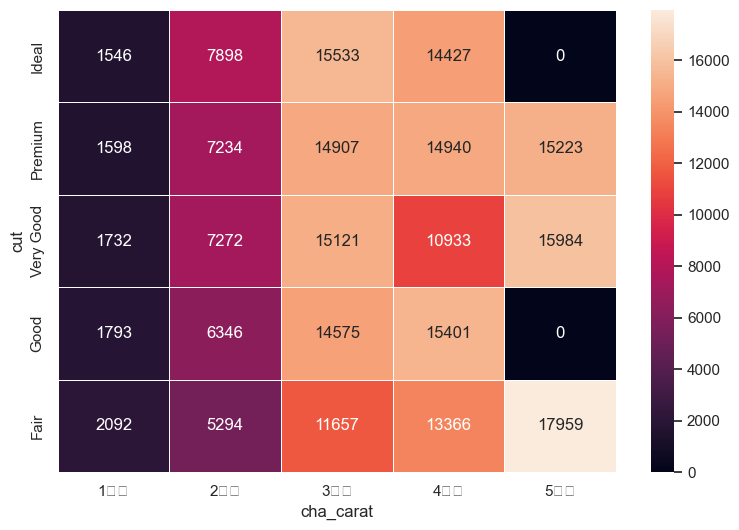

In [138]:
sns.set_theme()

flights = diamonds3.pivot("cut", "cha_carat", "price")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [27]:
wb = diamonds3

In [29]:
diamonds3.to_excel('C:/Users/user/Downloads/diamonds_output.xlsx')

In [30]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,cha_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,1캐럿
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,1캐럿
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,1캐럿
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,1캐럿
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3,1캐럿
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,1캐럿
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,1캐럿
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,1캐럿
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,1캐럿


In [32]:
diamonds = sns.load_dataset("diamonds")

In [33]:
diamonds.to_excel('C:/Users/user/Downloads/diamonds_output_origin.xlsx')